# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Observations: 
1. As the weight of the mouse increases, so do the mass of the turmor.
2. Both Capomulin and Ramicane have smaller average tumor sizes at the end of testing.
3. Capomulin and Ramicane had the most timepoints studied of all the drugs and placebo.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview



In [3]:
# Checking the number of mice.
unique_mice = total_data["Mouse ID"].unique()
len(unique_mice)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = total_data[total_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# print all data for mouse g989
duplicated = total_data.loc[total_data["Mouse ID"] == "g989"]
duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#delete mouse "g989" from the data
clean_data = total_data.loc[total_data["Mouse ID"] != "g989"]
grouped_data = clean_data
clean_data.loc[total_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [7]:
# Checking the number of mice in the clean DataFrame.

unique_clean_mice = clean_data["Mouse ID"].unique()
len(unique_clean_mice)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Header_summary = summary.rename(columns={"mean":"Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", "sem":"Tumor Volume Std. Err."})
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Header_summary


Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen\
#calculated above
summary
# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

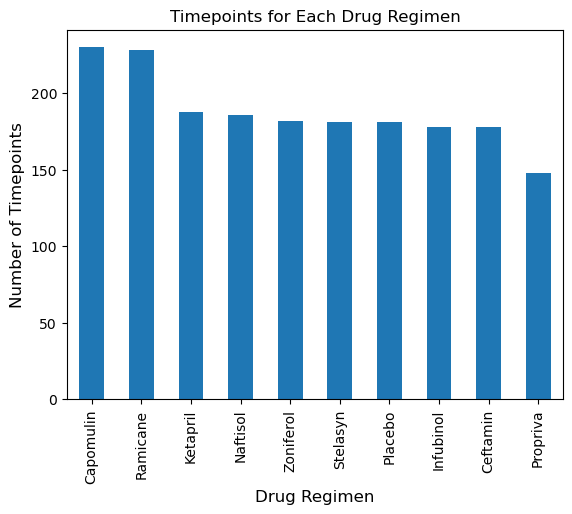

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#create dataframe for plots
drug_regimen = grouped_data["Drug Regimen"].value_counts()

#plot the bar chart & label
ax0 = drug_regimen.plot.bar(title = "Timepoints for Each Drug Regimen")
ax0.set_xlabel("Drug Regimen",fontsize=12)
ax0.set_ylabel("Number of Timepoints",fontsize=12)



Text(0, 0.5, 'Number of Timepoints')

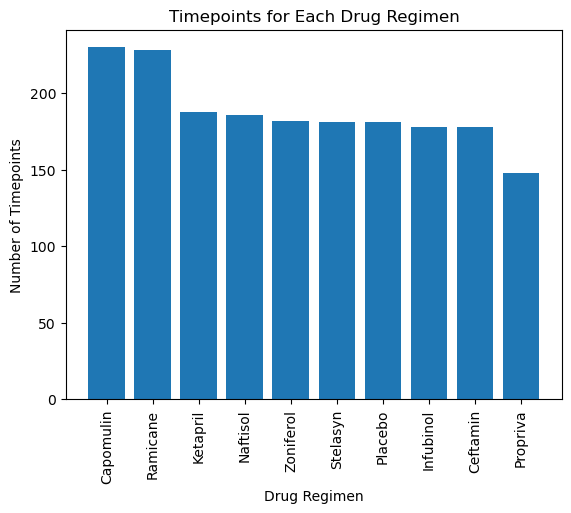

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_regimen.index.values, drug_regimen.values)
#set x labels vertical
plt.xticks(rotation=90)
#set title and labels
plt.title("Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


C:\Users\geoff\AppData\Local\Temp\ipykernel_26844\3066246161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_mice_gender.drop_duplicates(subset ="Mouse ID", keep = "first", inplace = True)


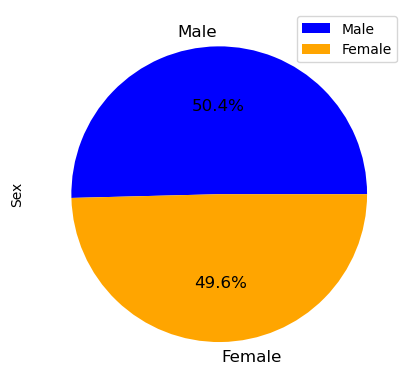

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#display male vs female mice
unique_mice_gender = clean_data[["Mouse ID", "Sex"]]
#keep only the first entry for each unique mouse  
unique_mice_gender.drop_duplicates(subset ="Mouse ID", keep = "first", inplace = True)
#set up dataframe for plots
#mvf = clean_data["Sex"].value_counts()
mvf = unique_mice_gender["Sex"].value_counts()

#set up plot using pandas
ax2 = mvf.plot(kind="pie", autopct="%1.1f%%", startangle=0,fontsize=12, legend=True, colors=["blue", "orange"])

In [13]:
# the data in the example is wrong because they don't calculate the unique mice in the dataframe and count every entry for each mouse,  they should only be usin the total of 249 mice, not 1888 entries.  I have corrected this in my code above.
unique_mice_gender["Sex"].value_counts()


Male      125
Female    123
Name: Sex, dtype: int64

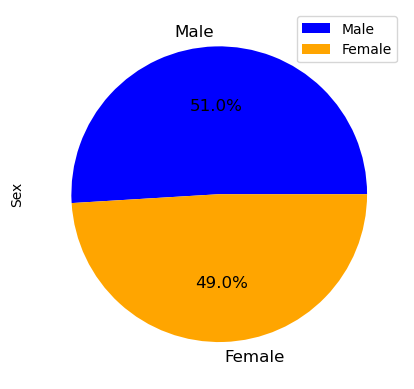

In [14]:
#here is the 51% male graph to show I can get it, but the data is produced incorrectly.
mvf = clean_data["Sex"].value_counts()
ax2 = mvf.plot(kind="pie", autopct="%1.1f%%", startangle=0,fontsize=12, legend=True, colors=["blue", "orange"])

Text(0.5, 1.0, 'Sex')

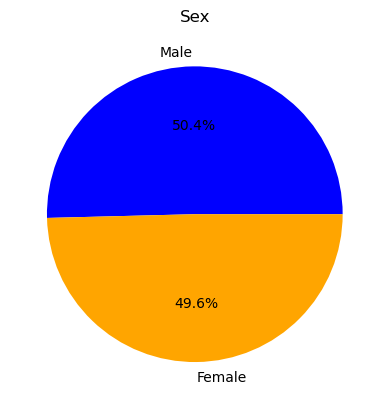

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mvf.values, labels=mvf.index.values, autopct="%1.1f%%", startangle=0, colors=["blue", "orange"])
#set title and labels
plt.title("Sex")



## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = grouped_data.groupby("Mouse ID").max()["Timepoint"]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint, grouped_data, on=("Mouse ID","Timepoint"),how="left")
last_timepoint_df.head(15)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
four_drugs = last_timepoint_df.loc[(last_timepoint_df["Drug Regimen"] == "Capomulin") | (last_timepoint_df["Drug Regimen"] == "Ramicane") | (last_timepoint_df["Drug Regimen"] == "Infubinol") | (last_timepoint_df["Drug Regimen"] == "Ceftamin")]

tumor_size = four_drugs[["Drug Regimen", "Tumor Volume (mm3)"]]
for drug in drugs:
    tumor_size = tumor_size.loc[(tumor_size["Drug Regimen"] == drug)]
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_size["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_size.loc[(tumor_size["Tumor Volume (mm3)"] < lower_bound) | (tumor_size["Tumor Volume (mm3)"] > upper_bound)]
    #print results
    print(f"{drug} potential outliers:")
    if len(outliers) == 0:
        print("None")
    else:
        print(f"{outliers}")
    #reset tumor_size to original dataframe
    tumor_size = four_drugs[["Drug Regimen", "Tumor Volume (mm3)"]]


   


Capomulin potential outliers:
None
Ramicane potential outliers:
None
Infubinol potential outliers:
   Drug Regimen  Tumor Volume (mm3)
31    Infubinol           36.321346
Ceftamin potential outliers:
None


Text(0, 0.5, 'Final Tumor Volume (mm3)')

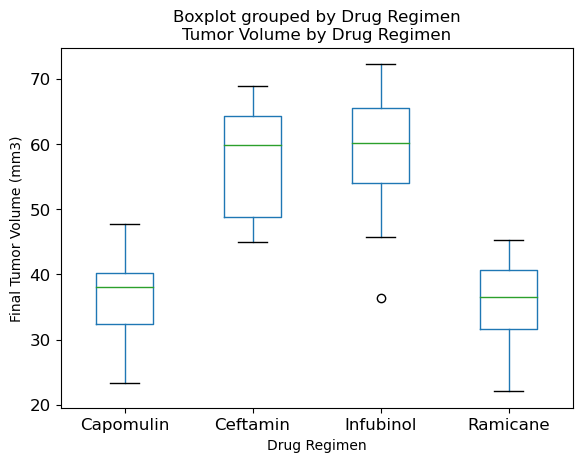

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_size.boxplot(by="Drug Regimen", grid=False, fontsize=12)
plt.title("Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

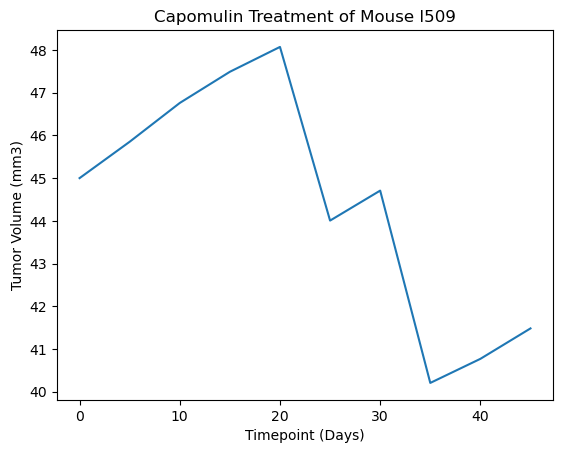

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_data_capomulin = total_data.loc[(total_data["Drug Regimen"] == "Capomulin")]
tumor_data_capomulin = tumor_data_capomulin.loc[(tumor_data_capomulin["Mouse ID"] == "l509")]
tumor_data_capomulin = tumor_data_capomulin[["Timepoint", "Tumor Volume (mm3)"]]
tumor_data_capomulin = tumor_data_capomulin.set_index("Timepoint")
tumor_data_capomulin.plot.line(title="Capomulin Treatment of Mouse l509", legend=False)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")




Text(0, 0.5, 'Average Tumor Volume (mm3)')

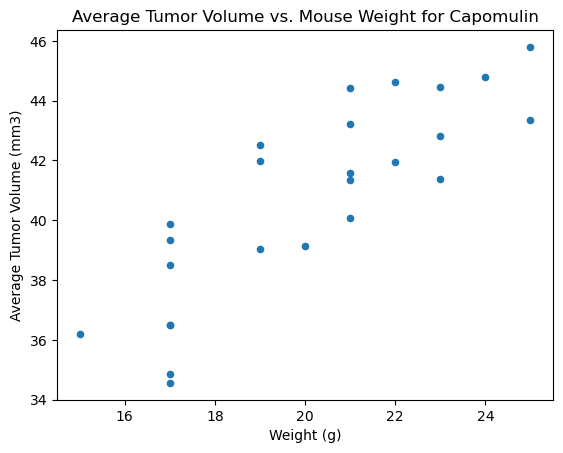

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_data_capomulin = total_data.loc[(total_data["Drug Regimen"] == "Capomulin")]
average_tumor = tumor_data_capomulin.groupby("Mouse ID").mean()
average_tumor.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", title="Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

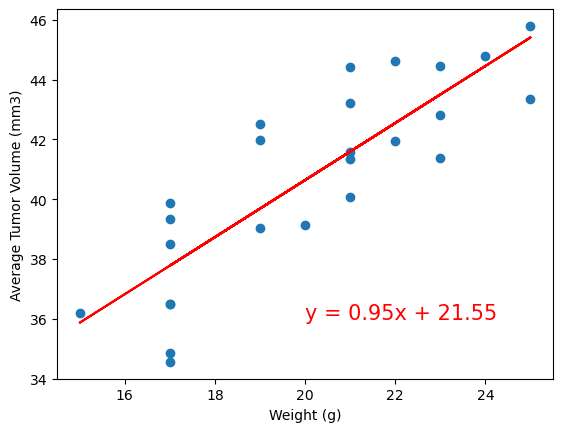

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = average_tumor["Weight (g)"]
y_values = average_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
